### Importing Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN
%matplotlib inline

#### Reading CSV

In [31]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [32]:
df=df.drop('Unnamed: 0',axis=1)

In [33]:
# Creating X & Y variables
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84,1990,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103,7362,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29,346,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74,306,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [34]:
# Creating X & Y variables
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   MonthlyCharges                           7032 non-null   int64
 2   TotalCharges                             7032 non-null   int64
 3   Churn                                    7032 non-null   int64
 4   gender_Female                            7032 non-null   int64
 5   gender_Male                              7032 non-null   int64
 6   Partner_No                               7032 non-null   int64
 7   Partner_Yes                              7032 non-null   int64
 8   Dependents_No                            7032 non-null   int64
 9   Dependents_Yes                           7032 non-null   int64
 10  PhoneService_No                          7032 non-null   int64
 11  Phon

### Handling the Class Imbalance

Churn
0    5163
1    1869
Name: count, dtype: int64


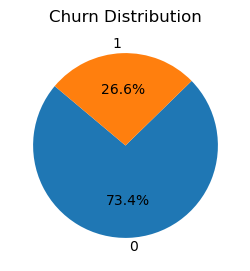

In [39]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

Data is imabalanced. So performing SMOTEENN (UpSampling + ENN)

Churn
0    5163
1    1869
Name: count, dtype: int64


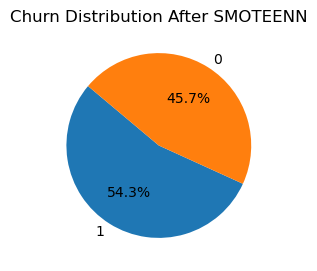

In [40]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

churn_counts1 = y_resampled.value_counts()
print(churn_counts)

plt.figure(figsize=(3, 3))
plt.pie(churn_counts1, labels=churn_counts1.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution After SMOTEENN')
plt.show()

#### Train Test Split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

### Model Training

#### Logistic Regression

In [45]:
# Create and train the  LogisticRegression  model
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = log_model.predict(x_test)

# Evaluating the model
print("Logistic Regression")
print(classification_report(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       535
           1       0.93      0.93      0.93       629

    accuracy                           0.93      1164
   macro avg       0.93      0.93      0.93      1164
weighted avg       0.93      0.93      0.93      1164



C:\Users\Savindu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [46]:
model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [47]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
dt_y_pred = model_dt.predict(x_test)

In [73]:
model_dt.score(x_test,y_test)

0.9407216494845361

In [74]:
print(classification_report(y_test, dt_y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       535
           1       0.94      0.95      0.95       629

    accuracy                           0.94      1164
   macro avg       0.94      0.94      0.94      1164
weighted avg       0.94      0.94      0.94      1164



#### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [53]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [76]:
rf_y_pred = model_rf.predict(x_test)

In [77]:
model_rf.score(x_test, y_test)

0.9381443298969072

In [78]:
print(classification_report(y_test, rf_y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       535
           1       0.92      0.97      0.94       629

    accuracy                           0.94      1164
   macro avg       0.94      0.94      0.94      1164
weighted avg       0.94      0.94      0.94      1164



#### Principle Component Analysis (PCA)

In [57]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(x_train)
xr_test_pca = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [58]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [60]:
model.fit(xr_train_pca, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
yr_predict_pca = model.predict(xr_test_pca)

In [65]:
model_score_r_pca = model.score(xr_test_pca, y_test)

In [67]:
print(model_score_r_pca)
print(metrics.classification_report(y_test, yr_predict_pca))

0.7139175257731959
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       535
           1       0.71      0.80      0.75       629

    accuracy                           0.71      1164
   macro avg       0.72      0.71      0.71      1164
weighted avg       0.72      0.71      0.71      1164



### Naive-Bayes Classifier

In [69]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

nb_y_pred = nb_model.predict(x_test)

print("Naive Bayes:")
print(classification_report(y_test, nb_y_pred))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       535
           1       0.89      0.91      0.90       629

    accuracy                           0.89      1164
   macro avg       0.89      0.89      0.89      1164
weighted avg       0.89      0.89      0.89      1164



### Support Vector Machine (SVM)

In [70]:
# Create and train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

svm_y_pred = svm_model.predict(x_test)

print("Support Vector Machine:")
print(classification_report(y_test, svm_y_pred))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       535
           1       0.82      0.71      0.76       629

    accuracy                           0.76      1164
   macro avg       0.77      0.77      0.76      1164
weighted avg       0.77      0.76      0.76      1164



## Compairing Results

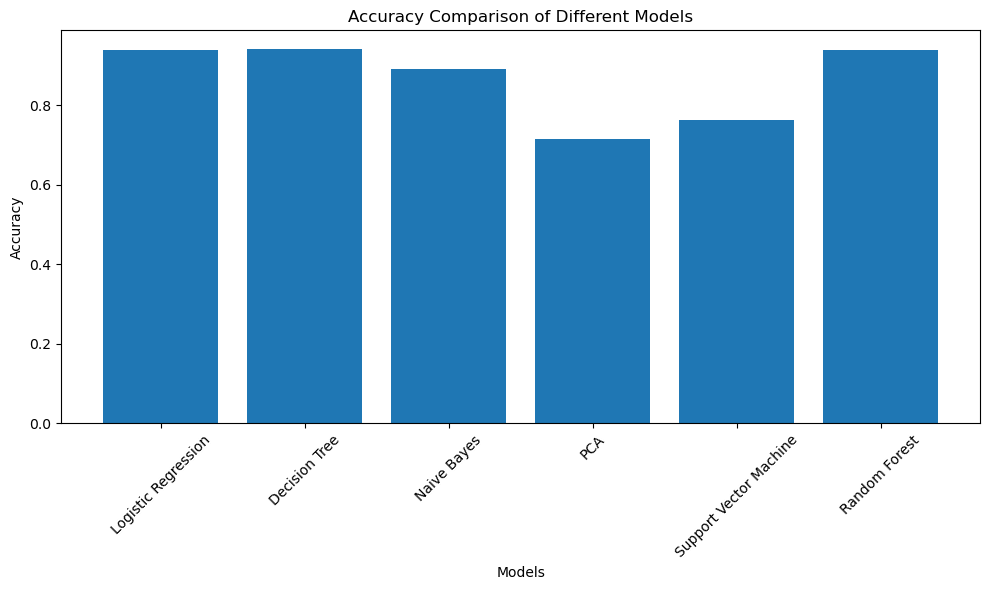

In [83]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, dt_y_pred),
    'Naive Bayes': accuracy_score(y_test, nb_y_pred),
    'PCA': accuracy_score(y_test, yr_predict_pca),
    'Support Vector Machine': accuracy_score(y_test, svm_y_pred),
    'Random Forest': accuracy_score(y_test, rf_y_pred)
}

# Set the figure size
acc_plt = plt.figure(figsize=(10, 6))

# Plot the bar graph
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()

figure = acc_plt.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

Considering the results, we decided to pick Random Forest Model with best overall performance

## Hyperparameter Tuning

In [84]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_rf_model = grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(x_test)

# Evaluate the model
print("Random Forest (after parameter tuning):")
print(classification_report(y_test, rf_y_pred))

Random Forest (after parameter tuning):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       535
           1       0.96      0.97      0.96       629

    accuracy                           0.96      1164
   macro avg       0.96      0.96      0.96      1164
weighted avg       0.96      0.96      0.96      1164



#### Pickling the model

In [85]:
import pickle

In [86]:
filename = 'model.sav'

In [87]:
pickle.dump(best_rf_model, open(filename, 'wb'))

In [88]:
load_model = pickle.load(open(filename, 'rb'))

In [89]:
model_score_r1 = load_model.score(x_test, y_test)

In [90]:
model_score_r1

0.9604810996563574

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.